In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../data/mango fruit/Image_26.jpg:Zone.Identifier
../data/mango fruit/Image_25.jpg:Zone.Identifier
../data/mango fruit/Image_15.jpg
../data/mango fruit/Image_8.jpg
../data/mango fruit/Image_7.jpg:Zone.Identifier
../data/mango fruit/Image_27.jpeg:Zone.Identifier
../data/mango fruit/Image_6.jpg
../data/mango fruit/Image_19.jpg
../data/mango fruit/Image_26.jpg
../data/mango fruit/Image_3.jpg
../data/mango fruit/Image_9.jpg
../data/mango fruit/Image_10.JPG:Zone.Identifier
../data/mango fruit/Image_24.jpg:Zone.Identifier
../data/mango fruit/Image_31.jpg
../data/mango fruit/Image_24.jpg
../data/mango fruit/Image_39.jpg
../data/mango fruit/Image_28.jpg:Zone.Identifier
../data/mango fruit/Image_4.jpg
../data/mango fruit/Image_37.jpeg:Zone.Identifier
../data/mango fruit/Image_25.jpg
../data/mango fruit/Image_6.jpg:Zone.Identifier
../data/mango fruit/Image_7.jpg
../data/mango fruit/Image_30.jpg
../data/mango fruit/Image_13.gif:Zone.Identifier
../data/mango fruit/Image_3.jpg:Zone.Identifier
../dat

# 1. Import Libraries

In [2]:
# Import Necessary libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import warnings
warnings.filterwarnings("ignore")
import os
from matplotlib.image import imread
import random
import matplotlib.image as mpimg

2023-10-16 09:51:15.421398: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-16 09:51:15.496703: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-16 09:51:15.496718: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-16 09:51:15.510772: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-16 09:51:15.924470: W tensorflow/stream_executor/platform/de

In [3]:
tf.random.set_seed(5)

In [4]:
# Data agumentation 
datagen = ImageDataGenerator(rotation_range=10,
            rescale = 1./255,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False,
            zoom_range=0.1,
            shear_range=0.1,
            brightness_range=[0.8, 1.2],
            fill_mode='nearest',
            validation_split=0.2  # set validation split to 20% 
            )

In [6]:
# Import the data into train and Validation subset
trainimagedata = datagen.flow_from_directory("../data",
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                              target_size=(64,64),
                                              subset = 'training'
                                            )

testimagedata = datagen.flow_from_directory("../data",
                                              batch_size = 32,
                                              class_mode = 'categorical',
                                              target_size=(64,64),
                                              subset = 'validation'
                                            )

Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.


In [7]:
trainimagedata.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8], dtype=int32)

In [8]:
trainimagedata.class_indices

{'apple fruit': 0,
 'banana fruit': 1,
 'cherry fruit': 2,
 'chickoo fruit': 3,
 'grapes fruit': 4,
 'kiwi fruit': 5,
 'mango fruit': 6,
 'orange fruit': 7,
 'strawberry fruit': 8}

In [9]:
# Print Each sample of all Classes
# Directory path where the images are located
directory_path = '/kaggle/input/fruits-dataset-images/images'

# List of class names
class_names = ['apple fruit', 'banana fruit', 'cherry fruit', 'chickoo fruit', 'grapes fruit', 'kiwi fruit', 'mango fruit', 'orange fruit', 'strawberry fruit']

# Create a figure to display the images
fig = plt.figure(figsize=(12, 8))

# Iterate over each class
for i, class_name in enumerate(class_names):
    # Get a list of image files in the class directory
    class_directory = os.path.join(directory_path, class_name)
    image_files = os.listdir(class_directory)

    # Select a random image file from the class
    random_image = random.choice(image_files)
    image_path = os.path.join(class_directory, random_image)

    # Load and display the image
    ax = fig.add_subplot(3, 3, i+1)
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.set_title(class_name)
    ax.axis('off')

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/fruits-dataset-images/images/apple fruit'

<Figure size 1200x800 with 0 Axes>

In [10]:
input_shape = trainimagedata.image_shape

# 2. CNN Model Architecture

In [11]:
# Model Architecture
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64,(3,3), input_shape = input_shape,activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(9,activation = 'softmax'))

2023-10-16 09:51:53.320543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-16 09:51:53.320637: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-16 09:51:53.320668: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-10-16 09:51:53.320694: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-10-16 09:51:53.320717: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [12]:
# Set the Hyperparameter to Adam optimizer
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.001,beta_1=0.9,beta_2 = 0.999, epsilon=1e-8)

In [13]:
# Compile the model
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience =15)

# 3. Fitting the CNN model

In [15]:
# Fitting the model
mdl_history = model.fit(trainimagedata,
                          validation_data = testimagedata,
                          epochs=35,
                          batch_size=16,
                          callbacks=[early_stop])

Epoch 1/35
9/9 [==============================] - 6s 670ms/step - loss: 2.2299 - accuracy: 0.1215 - val_loss: 2.1893 - val_accuracy: 0.1690
Epoch 2/35
9/9 [==============================] - 5s 594ms/step - loss: 2.1882 - accuracy: 0.1181 - val_loss: 2.1660 - val_accuracy: 0.1831
Epoch 3/35
9/9 [==============================] - 5s 574ms/step - loss: 2.1522 - accuracy: 0.1597 - val_loss: 2.0899 - val_accuracy: 0.2817
Epoch 4/35
9/9 [==============================] - 5s 617ms/step - loss: 2.0652 - accuracy: 0.2535 - val_loss: 1.9160 - val_accuracy: 0.3239
Epoch 5/35
9/9 [==============================] - 5s 626ms/step - loss: 1.8769 - accuracy: 0.3021 - val_loss: 1.7084 - val_accuracy: 0.3944
Epoch 6/35
9/9 [==============================] - 5s 621ms/step - loss: 1.7950 - accuracy: 0.3056 - val_loss: 1.5813 - val_accuracy: 0.4085
Epoch 7/35
9/9 [==============================] - 5s 618ms/step - loss: 1.7275 - accuracy: 0.3368 - val_loss: 1.5505 - val_accuracy: 0.3944
Epoch 8/35
9/9 [====

In [ ]:
model.summary()

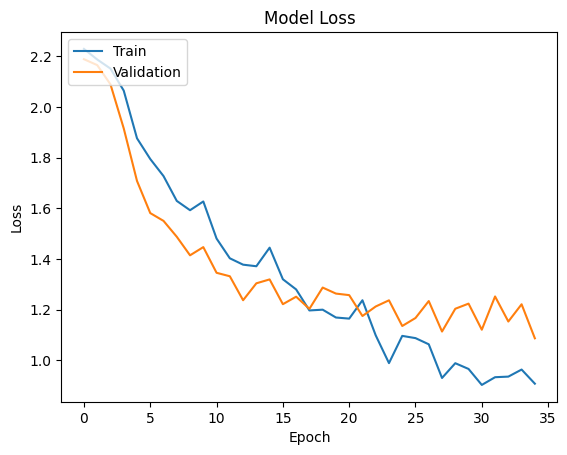

In [41]:
# Let's visualize training and testing loss
plt.plot(mdl_history.history['loss'])
plt.plot(mdl_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

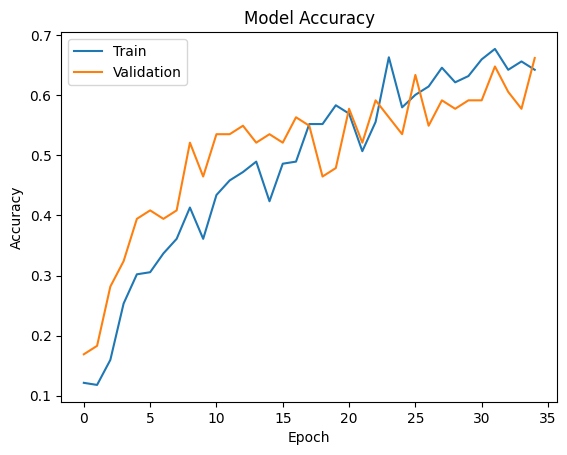

In [42]:
# Let's visualize training and testing accuracy by graph
plt.plot(mdl_history.history['accuracy'])
plt.plot(mdl_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 4.Model prediction

In [18]:
# Model prediction
y_preds = model.predict(testimagedata)

3/3 [==============================] - 1s 304ms/step


In [19]:
# Model Evaluation With metrcics
y_eva = model.evaluate(testimagedata)

3/3 [==============================] - 1s 188ms/step - loss: 1.0705 - accuracy: 0.6901


## Sample image prediction

In [40]:
# Let's check our model predict kiwi fruit Class or not (Actual kiwi fruit class is 5)
from tensorflow.keras.preprocessing import image
new_image = image.load_img("../data/banana fruit/Image_12.jpg",target_size = (64,64))
image_array = image.img_to_array(new_image)
image_final = np.expand_dims(image_array ,axis=0)
image_final /= 255.
img_pred = model.predict(image_final)
sample_pred = np.argmax(img_pred)
sample_pred

1/1 [==============================] - 0s 12ms/step


1

1/1 [==============================] - 0s 14ms/step


1

"If you enjoyed my notebook, please consider giving me an upvote! Your support will help me to reach more people and make a positive impact with my work !!!!